In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display, Javascript
plt.style.use('seaborn-whitegrid')

# Visualising Stock Prices

## 1. The Data as CSV

We've already downloaded a file containing the stock prices of Facebook from http://www.nasdaq.com/symbol/fb/historical. It is called `HistoricalQuotes.csv`. CSV is short for *Comma-Separated Values* and if we open the file in simple text editor, we'll see why:

![alt text](CSV_as_text.jpg)

The first line is a header for the values we are interested in. We see that the header names as well as the values in the lines below are separated by commas.

## 2. Creating a Pandas DataFrame

But how can we use Python to create a nice presentation of this data? A widely used solution to import the csv-file as a `pandas.DataFrame` and then use `matplotlib` to create a nice looking plot. Thus we need to import the module `pandas` and `matplotlib.pyplot`. The standard way to do so is:

```python
import pandas as pd
import matplotlib.pyplot as plt
```

`Pandas` offers a method called `read_csv` that we want to apply to `HistoricalQuotes.csv`.

The general syntax is 

`dataframename = pd.read_csv( filename.csv )`

Now create a `DataFrame` called `stockdata` from the file `HistoricalQuotes.csv`!

In [2]:
# use pd.read_csv here
stockdata = pd.read_csv("HistoricalQuotes.csv")

In [3]:
def run_above(ev):
    display(Javascript('IPython.notebook.execute_cells_above()'))

button = widgets.Button(description="Run")
button.on_click(run_above)
display(button)

Let's have a look at our `stockdata`! We can use `print` to display the data.

In [4]:
# print the stockdata
print(stockdata)

          date   close         volume    open      high     low
0        16:00  170.60     15,868,197  171.65  172.2500  168.89
1   2017/10/25  170.60  15861100.0000  171.90  172.2500  168.89
2   2017/10/24  171.80  12163060.0000  172.30  173.2400  171.50
3   2017/10/23  171.27  13807700.0000  175.20  175.3400  171.25
4   2017/10/20  174.98  12422870.0000  175.50  175.8800  174.63
5   2017/10/19  174.56  13873480.0000  174.93  176.0300  172.63
6   2017/10/18  176.03  12723070.0000  176.65  176.7400  175.75
7   2017/10/17  176.11  15926670.0000  174.71  176.1300  174.36
8   2017/10/16  174.52  11455560.0000  174.49  175.0000  174.06
9   2017/10/13  173.74  13601140.0000  173.45  174.6500  173.20
10  2017/10/12  172.55  10461960.0000  172.61  173.8500  172.29
11  2017/10/11  172.74  11251830.0000  171.95  172.7800  171.40
12  2017/10/10  171.59  11330830.0000  173.00  173.2000  170.80
13  2017/10/09  172.50  14552670.0000  172.70  174.8800  172.00
14  2017/10/06  172.23  12711640.0000  1

This look quite a lot like the original CSV-file, just a bit cleaner. So what did we actually achieve?

Now here comes the strength of `pandas`: Its `DataFrames` offer their own already built-in `plot`-method!

## 3. Visualising a DataFrame

Let's just see what happens what we plot our `stockdata`.

<IPython.core.display.Javascript object>


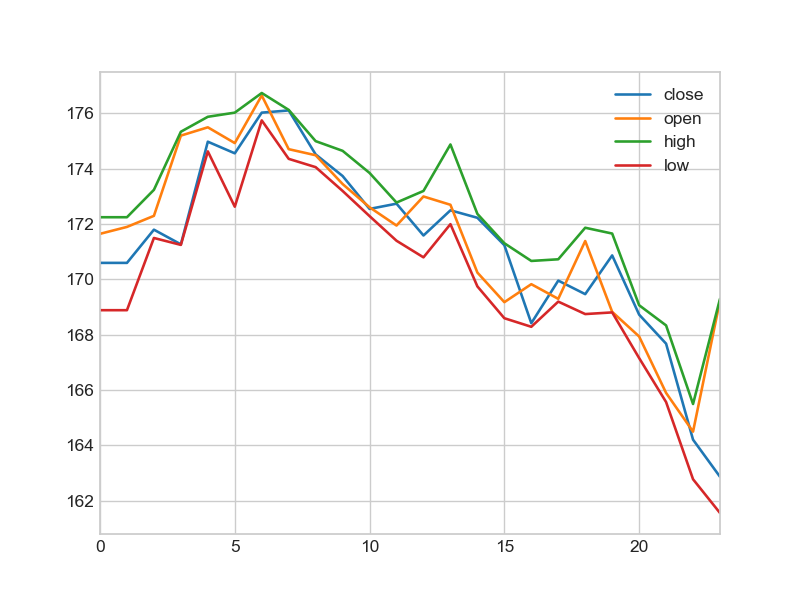

In [5]:
# Just type `stockdata.plot()`.
stockdata.plot()

That already looks quite nice! But if we take a closer look at the diagram and compare it to the data, we'll discover some problems:

1. The axes don't have labels.
2. The x-axis shows the row index but we want the date there.
3. The most severe problem: The values above 174 were recorded in October and the values below 170 are from September!  
That means our diagram's time scale is inverted. How to fix that? 


Let's first take a look at our `stockdata` again. We could print it just imagine we had a file with thousands of rows. That would be quite messy on the screen. There's a far more elegant way to look into the data. We can use the methods `head()` and `tail()` to show the first five or the last five entries of a `DataFrame`.

In [6]:
# Use the method head() on stockdata to show the first five entries.
stockdata.head()

,date,close,volume,open,high,low
0,16:00,170.60,"15,868,197",171.65,172.25,168.89
1,2017/10/25,170.60,15861100.0000,171.90,172.25,168.89
2,2017/10/24,171.80,12163060.0000,172.30,173.24,171.50
3,2017/10/23,171.27,13807700.0000,175.20,175.34,171.25
4,2017/10/20,174.98,12422870.0000,175.50,175.88,174.63


In [7]:
# Use the method tail() on stockdata to show the last five entries.
stockdata.tail()

,date,close,volume,open,high,low
19,2017/09/29,170.87,15274870.0000,168.83,171.6600,168.81
20,2017/09/28,168.73,12157690.0000,167.94,169.0696,167.16
21,2017/09/27,167.68,19131680.0000,165.90,168.3400,165.57
22,2017/09/26,164.21,23083780.0000,164.50,165.5000,162.78
23,2017/09/25,162.87,41207930.0000,169.24,169.3000,161.56


We realise that the entries in row 0 differ from those in the other rows. That's because the file had been downloaded on 26th of October before the marked closed. But we don't even see that it was on that day! Also the value in the column **close** is misleading as the marked wasn't closed!

Let's assume that we are not interested in an intraday tracker but only analyse full trading days. Under this asumption it's best just to dismiss the first row.

This can be done by slicing exactly the same way as slicing a list!

```python
stockdata_mod = stockdata[1:]
```

Like lists, `DataFrames` also can be sorted. We want to sort by the values of the column **date**.

```python
stockdata_mod.sort_values("date")
```
These operations result in our `stockdata_mod` looking like this:

<img align="left" src="stockdata_cleaned_and_sorted.jpg">
<div style="clear: both"></div>

We see that the index column is still in the wrong order. The following command replaces the index column with a new correctly indexed one.

```python
stockdata_mod = stockdata_mod.reset_index(drop=True)
```

Now do all this by yourself with just one command!

In [8]:
# Slice, sort and reindex stockdata in one line!
stockdata_mod = stockdata[1:].sort_values("date").reset_index(drop=True)

<IPython.core.display.Javascript object>


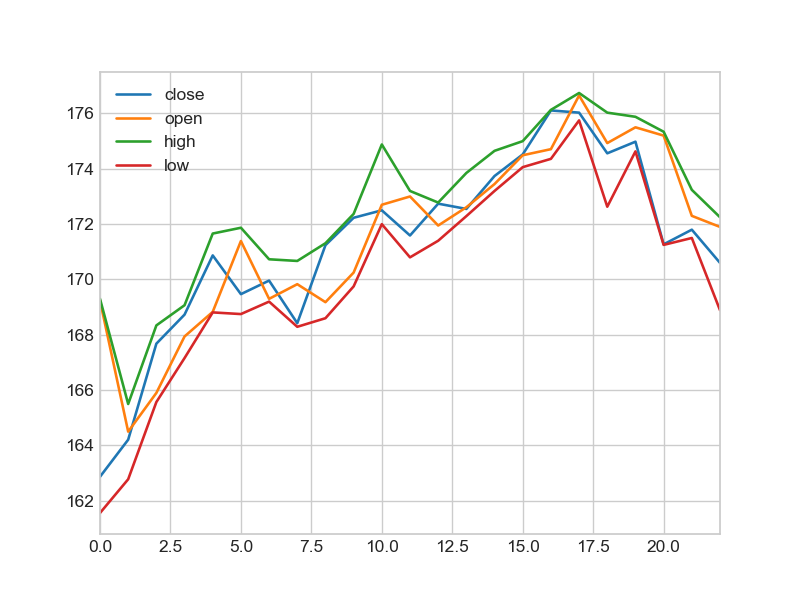

In [9]:
#Now plot stockdata_mod!
stockdata_mod.plot()

Now that looks much better! But we are still not happy with the axes. That's what we can do:

1. We choose to only display **close**, **high** and **low**, and furthermore store the whole plot into a variable called `ax`.   

   ```python
   ax = stockdata_mod[ ["close", "high", "low"] ].plot()
   ```
2. We give the diagram a title.  

   ``` python 
   ax.set_title("Facebook Inc.")
   ```
3. We give the x-axis a label.  

   ``` python
   ax.set_xlabel('Date')
   ```
4. We give the y-axis a label..  
 
   ```python
   ax.set_ylabel('Stock Price in USD')
   ```
5. We like to display the name of each day for every forth day (otherwise the x-axis will be too crowded).  
   We use the index of `stockdata_mod` together with list slicing to choose where the ticks should be and afterwards we 
   give these ticks their proper labels.
   
   ```python
   ax.set_title("Facebook Inc.")
   ax.set_xticklabels(stockdata_mod.date[::4])
   ```

<IPython.core.display.Javascript object>


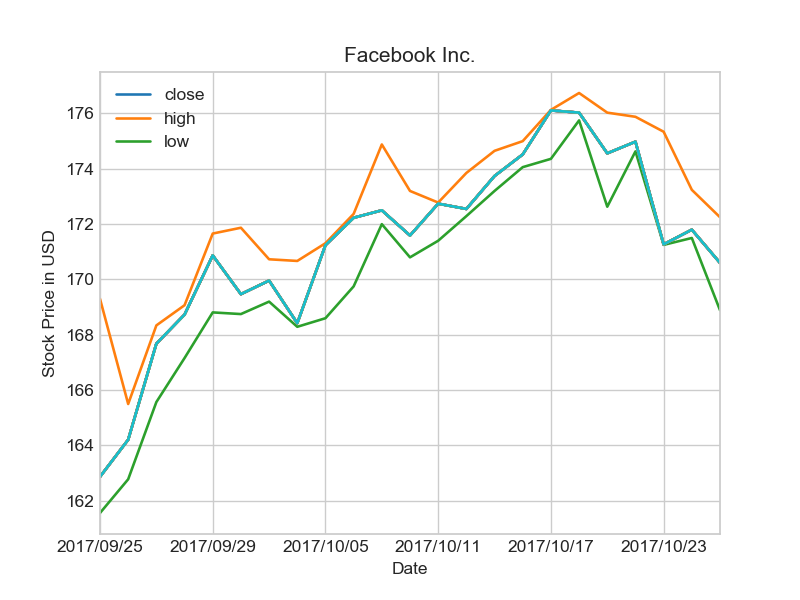

In [10]:
# Now try all these by yourself
ax = stockdata_mod[ ["close", "high", "low"] ].plot()
ax.set_title("Facebook Inc.")
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price in USD')
ax.set_xticks(stockdata_mod.index[::4])
ax.set_xticklabels(stockdata_mod.date[::4]);

## Exercise

Put all this stuff in a single function that takes a CSV-file and generates a plot.